In [11]:
import numpy as np
import sorting
from matplotlib import pyplot as plt
from tqdm import tqdm
from timeit import default_timer as timer
from scipy.optimize import curve_fit
import networkx as nx

np.random.seed(42)


In [2]:
# estimator functions for theoretical complexity
def const_est(x, a):
    return np.ones_like(x) * a


def linear_est(x, a):
    return a*x


def nlogn_est(x, a):
    return a*x*np.log(x)


def quad_est(x, a):
    return a*x**2


def cubic_est(x, a):
    return a*x**3


In [3]:
def plot_times(avg_time, est_func, experiment_title):
    if est_func == nlogn_est:
        xdata = np.linspace(1, len(avg_time), len(avg_time)-1, dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(est_func, xdata, ydata[1:])
    else:
        xdata = np.arange(len(avg_time), dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(est_func, xdata, ydata)
    plt.plot(avg_time)
    plt.title(f"Time measurement for {experiment_title}")
    plt.grid(True)
    plt.plot(xdata, est_func(xdata, *popt), 'r-',
             label='fit: a=%5.3f, ' % tuple(popt))
    plt.legend(["Experimental", "Theoretical"])
    plt.show()


In [8]:
def mergesort(v):
    return sorting.merge(v)


In [9]:
def measure_time(n_runs, n_experiments, func, matrix=False):
    times = []
    for i in range(n_runs):
        times.append([])
        for j in tqdm(range(1, n_experiments + 1)):
            if matrix:
                matrix_a = np.random.rand(j, j)
                matrix_b = np.random.rand(j, j)
                start_time = timer()
                func(matrix_a, matrix_b)
                times[i].append(timer() - start_time)
            else:
                v = np.random.rand(j)
                start_time = timer()
                func(v)
                times[i].append(timer() - start_time)
            
    return np.array(times, dtype=np.float64).mean(axis=0)


100%|██████████| 2000/2000 [00:09<00:00, 220.82it/s]


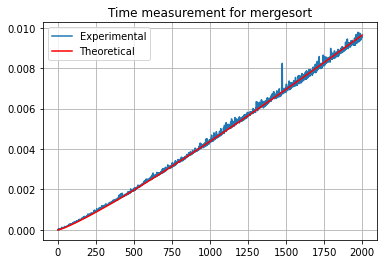

In [10]:
avg_time = measure_time(5, 2000, mergesort)
plot_times(avg_time, nlogn_est, "mergesort")


True
True


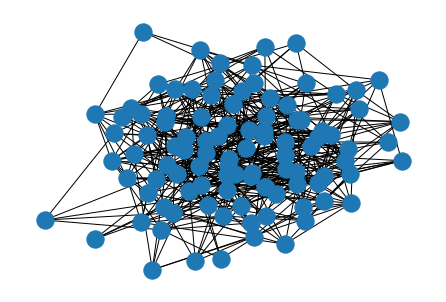

In [47]:
seed=45

n = 100
m = 500

g = nx.gnm_random_graph(n, m, seed=seed)
weights = np.random.randint(100, size=m)

weights_matrix = np.zeros((m, m))

for i, elem in enumerate(g.edges()):
    g[elem[0]][elem[1]]['weight'] = weights[i]
    g[elem[1]][elem[0]]['weight'] = weights[i]
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(g).todense() == nx.linalg.graphmatrix.adjacency_matrix(g).todense().T))
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(g).todense() >= 0))
nx.draw(g)


In [50]:
paths = nx.algorithms.shortest_paths.dense.floyd_warshall(g, 'weight')
print(paths[42][69])

71


In [67]:
def measure_fw_time(n_runs, n_experiments):
    times = []
    shift = 1
    edges_multiplier = 5
    for i in range(n_runs):
        times.append([])
        for j in tqdm(range(shift, n_experiments + shift)):
            nodes = j
            m = edges_multiplier * j

            g = nx.gnm_random_graph(nodes, m)
            weights = np.random.randint(j, size=m)
            for k, elem in enumerate(g.edges()):
                g[elem[0]][elem[1]]['weight'] = weights[k]
                g[elem[1]][elem[0]]['weight'] = weights[k]
            start_time = timer()
            nx.algorithms.shortest_paths.dense.floyd_warshall(g, 'weight')
            times[i].append(timer() - start_time)

    return np.array(times, dtype=np.float64).mean(axis=0)


100%|██████████| 100/100 [00:08<00:00, 12.12it/s]


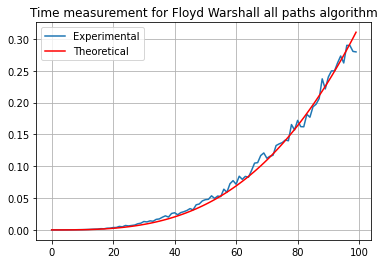

In [69]:
avg_time_fw = measure_fw_time(3, 100)
plot_times(avg_time_fw, cubic_est, "Floyd Warshall all paths algorithm")